In [2]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the data

breast = pd.read_csv(r"C:\Users\Admin\Desktop\Breast Cancer For Project Work.csv")

# To see the top 5 rows in the data

breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# To instantiate LabelEncoder

le = LabelEncoder()
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [5]:
# To see the top 5 rows in the data

breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

In [7]:
# To check the dimension of the data

breast.shape

(569, 32)

In [8]:
breast_counts = breast['diagnosis'].value_counts()

In [9]:
print("diagnosis:")
print(breast_counts)

diagnosis:
0    357
1    212
Name: diagnosis, dtype: int64


In [10]:

# Define features (x) and labels (y)
x = breast.drop('diagnosis', axis=1)  # Features (all columns except label)
y = breast['diagnosis']  # Labels

In [11]:
# To split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0, stratify =y)

In [12]:
# To check their dimension

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 31), (114, 31), (455,), (114,))

## Logistic Regression

In [13]:
# To instantiate the Standard scaler

scaler = StandardScaler()

# To calculate and convert the variables to have a mean of 0 and standard deviation of 1

x_train_scaler = scaler.fit_transform(x_train)

x_test_scaler = scaler.transform(x_test)

In [15]:
# Create an instant of the logistics regression

logreg = LogisticRegression(random_state=0)

#To train or build the model

logreg.fit(x_train_scaler, y_train)

LogisticRegression(random_state=0)

In [21]:
# To get the parameters of the model
parameters = logreg.get_params()

In [22]:
print("LogReg Parameters:")

for param, value in parameters.items():
    print(f"{param}: {value}")

LogReg Parameters:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: 0
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


In [14]:

# function to compute different metrics to check performance of a classification model

def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
     # convert probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute accuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],),
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf, fmt="g", annot=True)
    plt.ylabel("Actual Value")
    plt.xlabel("Predicted value")
    plt.show()

    return df_perf

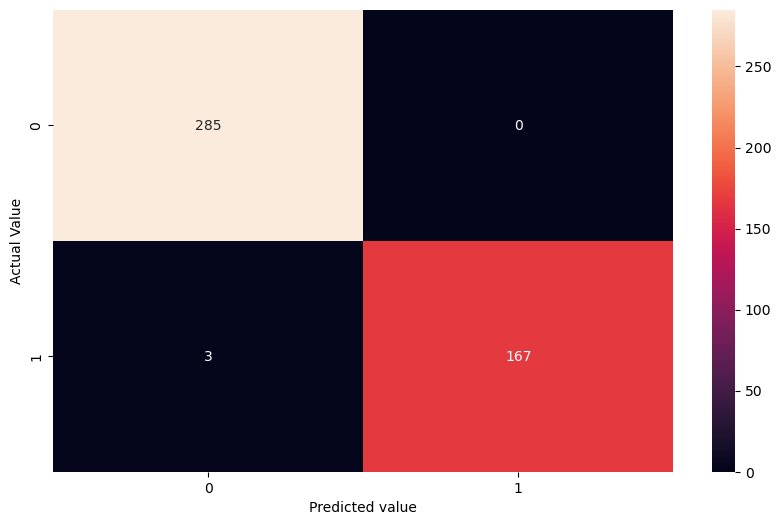

(   Accuracy    Recall  Precision  F1-score
 0  0.993407  0.982353        1.0  0.991098,)

In [15]:
# Training performance

breast_train_logreg = model_performance_classification(logreg, x_train_scaler, y_train)
breast_train_logreg

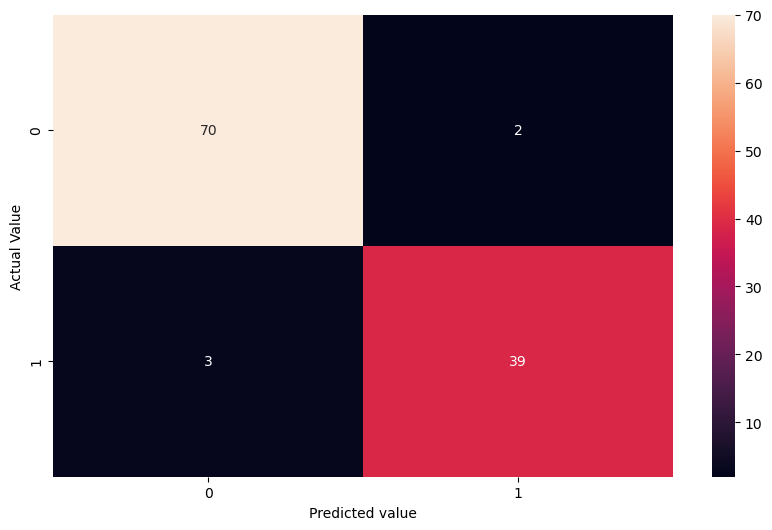

(   Accuracy    Recall  Precision  F1-score
 0   0.95614  0.928571    0.95122  0.939759,)

In [16]:
# Test Performance

breast_test_logreg = model_performance_classification(logreg, x_test_scaler, y_test)
breast_test_logreg